<a href="https://colab.research.google.com/github/cmp-math/PIC-Math-Workshop-on-Data-Science-2022/blob/main/KNNeighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pa
import sklearn
import matplotlib.pylab as py
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

try:
    import chemparse
except:
    !pip install chemparse
    print('May need to restart kernel to use chemparse')

import pandas as pd
url = 'https://raw.githubusercontent.com/rcpaffenroth/PIC-Math-Workshop-on-Data-Science-2022/main/data/lithium_ion_data.csv'
data = pd.read_csv(url)
data.drop(columns=['Materials Id'],inplace=True)
data['Has Bandstructure'] = data['Has Bandstructure'].map({True:1, False:0})

import chemparse
chem_data = data['Formula'].apply(chemparse.parse_formula)

# Convert the dictionary into a dataframe and fill NaN's with zero's
chem_data = pd.json_normalize(chem_data)
chem_data = chem_data.fillna(0)

data = data.join(chem_data)
data['Crystal System (#)'] = data['Crystal System'].map({'monoclinic':0, 'orthorhombic':1, 'triclinic':2})
data.sample(10)

,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System,Li,Mn,Si,O,Fe,Co,Crystal System (#)
83,Li3Fe2(SiO4)2,Pc,-2.556,0.069,1.923,30,2.891,363.781,1,monoclinic,3.0,0.0,2.0,8.0,2.0,0.0,0
159,Li3MnSi2O7,Pbnm,-2.709,0.069,1.472,52,2.895,559.694,1,orthorhombic,3.0,1.0,2.0,7.0,0.0,0.0,1
299,Li2Fe5Si5O16,P1,-2.620,0.049,2.117,28,3.101,369.232,1,triclinic,2.0,0.0,5.0,16.0,5.0,0.0,2
32,Li2MnSi4O11,C2/c,-2.832,0.091,1.370,36,2.868,413.524,1,monoclinic,2.0,1.0,4.0,11.0,0.0,0.0,0
98,Li2CoSiO4,Pc,-2.537,0.000,2.957,16,3.216,170.265,1,monoclinic,2.0,0.0,1.0,4.0,0.0,1.0,0
39,Li2FeSiO4,Pc,-2.621,0.005,3.027,16,3.073,174.862,1,monoclinic,2.0,0.0,1.0,4.0,1.0,0.0,0
66,Li10Fe(SiO5)2,C2/m,-2.476,0.055,1.715,46,2.399,472.581,1,monoclinic,10.0,0.0,2.0,10.0,1.0,0.0,0
164,Li3MnSiO5,P21nb,-2.529,0.077,0.235,40,2.798,436.412,1,orthorhombic,3.0,1.0,1.0,5.0,0.0,0.0,1
305,Li6Fe(SiO4)2,P1,-2.595,0.063,3.736,17,2.678,174.618,1,triclinic,6.0,0.0,2.0,8.0,1.0,0.0,2
213,Li2Fe(Si2O5)3,Cmce,-2.918,0.067,3.155,96,2.527,1257.084,0,orthorhombic,2.0,0.0,6.0,15.0,1.0,0.0,1


In [19]:
monoclinic_data=data[data['Crystal System'] == 'monoclinic']
orthorhombic_data=data[data['Crystal System'] == 'orthorhombic']
triclinic_data=data[data['Crystal System'] == 'triclinic']

monoclinic_data_sampled = monoclinic_data.sample(n=len(triclinic_data))
orthorhombic_data_sampled = orthorhombic_data.sample(n=len(triclinic_data))

data_rebalanced=triclinic_data.append(monoclinic_data_sampled).append(orthorhombic_data_sampled).reset_index(drop=True)

ord_feat = ['Formation Energy (eV)','E Above Hull (eV)','Band Gap (eV)',
            'Nsites','Density (gm/cc)','Volume','Has Bandstructure',
            'Li','Mn','Si','O','Fe','Co'
           ]


X = np.array(data_rebalanced[ord_feat])
y = np.array(data_rebalanced['Crystal System (#)'])
data_rebalanced.sample(10) 


,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System,Li,Mn,Si,O,Fe,Co,Crystal System (#)
47,Li5Fe5Si7O24,P1,-2.646,0.073,2.391,41,2.550,582.533,1,triclinic,5.0,0.0,7.0,24.0,5.0,0.0,2
142,LiCoSiO4,Pc,-2.349,0.086,1.474,14,3.096,169.421,1,monoclinic,1.0,0.0,1.0,4.0,0.0,1.0,0
8,Li2Mn(Si2O5)2,P1,-2.958,0.054,3.036,34,2.633,430.361,1,triclinic,2.0,1.0,4.0,10.0,0.0,0.0,2
159,LiFeSiO4,Pna21,-2.587,0.035,1.675,84,3.644,846.947,1,orthorhombic,1.0,0.0,1.0,4.0,1.0,0.0,1
215,LiFeSiO4,Pbnm,-2.611,0.010,2.300,28,3.563,288.720,1,orthorhombic,1.0,0.0,1.0,4.0,1.0,0.0,1
213,LiFeSiO4,P21nb,-2.566,0.055,2.630,28,2.882,356.872,1,orthorhombic,1.0,0.0,1.0,4.0,1.0,0.0,1
106,LiFe(Si2O5)2,P2/c,-2.985,0.009,3.362,32,2.430,457.962,0,monoclinic,1.0,0.0,4.0,10.0,1.0,0.0,0
146,LiFe(Si3O7)2,Icma,-2.981,0.093,2.647,88,2.807,1077.384,0,orthorhombic,1.0,0.0,6.0,14.0,1.0,0.0,1
165,Li2Fe2(SiO3)3,Pnma,-2.690,0.077,3.087,64,3.128,751.301,1,orthorhombic,2.0,0.0,3.0,9.0,2.0,0.0,1
120,LiFeSiO4,P21/c,-2.562,0.059,2.871,28,2.843,361.839,1,monoclinic,1.0,0.0,1.0,4.0,1.0,0.0,0


In [20]:
%matplotlib inline

In [34]:
# # Import the K-NN solver
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=25)

In [22]:
# This is the one complicated bit of code in the whole demo.  There is no need to modify it, but please feel free if you want!
def runTest(clf,X,y,trainingPercent=0.66,plotTest=True):
    # A little cheat to make the pictures consistent
    np.random.seed(1234)
    
    # If there is one thing that I want to harp on, it is the difference
    # between testing and training errors!  So, here we create a training
    # set on which we computer the parameters of our algorithm, and a 
    # testing set for seeing how well we generalize (and work on real 
    # world problems).
    perm = np.random.permutation(len(y))
    n = X.shape[0]
    trainSize = int(trainingPercent*n)
    Xtrain = X[perm[:trainSize],0:2]
    Xtest = X[perm[trainSize:],0:2]

    yHat = y
    yHattrain = yHat[perm[:trainSize]]
    yHattest = yHat[perm[trainSize:]]

    # Run the calculation!
    clf.fit(Xtrain, yHattrain)
    
    # step size in the mesh for plotting the decision boundary.
    h = .02  
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    py.figure(figsize=(8, 6))
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    py.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Plot also the training points
    py.scatter(Xtrain[:, 0], Xtrain[:, 1], c=yHattrain, cmap=cmap_bold,marker='o')
    if plotTest:
        py.scatter(Xtest[:, 0], Xtest[:, 1], c=yHattest, cmap=cmap_bold,marker='+')
    py.xlim(xx.min(), xx.max())
    py.ylim(yy.min(), yy.max())
    # py.show()

    # Print out some metrics
    print('training score',clf.score(Xtrain,yHattrain))
    print('testing score',clf.score(Xtest,yHattest))

training score 0.647887323943662
testing score 0.5135135135135135


(-3.1, -2.0)

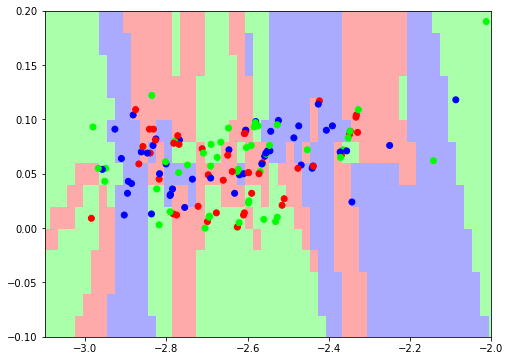

In [23]:
# Plot KNearestNeighbors
runTest(clf,X,y,plotTest=False)
import matplotlib.pyplot as plt

plt.ylim((-0.1,0.2))
plt.xlim((-3.1,-2.0))

training score 0.4295774647887324
testing score 0.32432432432432434


(-3.1, -2.0)

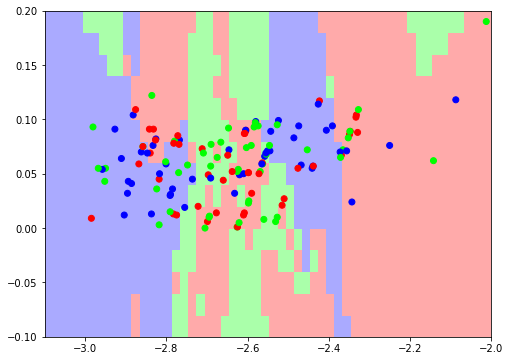

In [33]:
# Plot KNearestNeighbors
data_rebalanced['Spacegroup (ordinal)'] = pd.factorize(data_rebalanced['Spacegroup'])[0]

ord_feat = ['Formation Energy (eV)','E Above Hull (eV)','Band Gap (eV)',
            'Nsites','Density (gm/cc)','Volume','Has Bandstructure',
            'Spacegroup (ordinal)','Li','Mn','Si','O','Fe','Co'
           ]

X = np.array(data_rebalanced[ord_feat])
y = np.array(data_rebalanced['Crystal System (#)'])
data_rebalanced.sample(10) 
runTest(clf,X,y,plotTest=False)

#import matplotlib.pyplot as plt

plt.ylim((-0.1,0.2))
plt.xlim((-3.1,-2.0))

training score 0.9929577464788732
testing score 0.9864864864864865


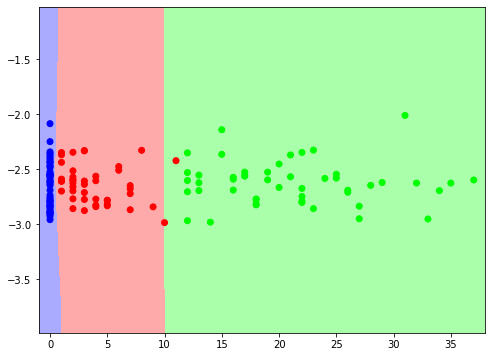

In [25]:
# Plot KNearestNeighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=14)
data_rebalanced['Spacegroup (ordinal)'] = pd.factorize(data_rebalanced['Spacegroup'])[0]

ord_feat = ['Spacegroup (ordinal)','Formation Energy (eV)','E Above Hull (eV)','Band Gap (eV)',
            'Nsites','Density (gm/cc)','Volume','Has Bandstructure',
            'Li','Mn','Si','O','Fe','Co'
           ]

X = np.array(data_rebalanced[ord_feat])
y = np.array(data_rebalanced['Crystal System (#)'])
data_rebalanced.sample(10) 
runTest(clf,X,y,plotTest=False)

#import matplotlib.pyplot as plt

#plt.ylim((-0.1,0.2))
#plt.xlim((-3.1,-2.0))

training score 0.9577464788732394
testing score 0.972972972972973


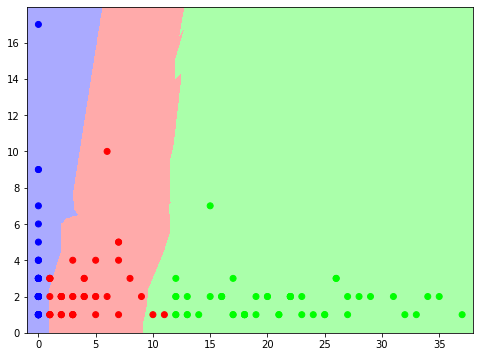

In [26]:
# Plot KNearestNeighbors
data_rebalanced['Spacegroup (ordinal)'] = pd.factorize(data_rebalanced['Spacegroup'])[0]

ord_feat = ['Spacegroup (ordinal)','Li']

X = np.array(data_rebalanced[ord_feat])
y = np.array(data_rebalanced['Crystal System (#)'])
data_rebalanced.sample(10) 
runTest(clf,X,y,plotTest=False)

#import matplotlib.pyplot as plt

#plt.ylim((-0.1,0.2))
#plt.xlim((-3.1,-2.0))

training score 0.4647887323943662
testing score 0.4864864864864865


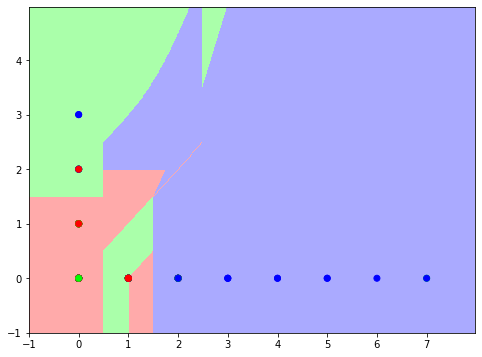

In [27]:
# Plot KNearestNeighbors
data_rebalanced.sort_values(by = 'Volume',ascending = True)
data_rebalanced['Spacegroup (ordinal)'] = pd.factorize(data_rebalanced['Spacegroup'])[0]

ord_feat = ['Fe','Co','Li','Mn','Si','O']

X = np.array(data_rebalanced[ord_feat])
y = np.array(data_rebalanced['Crystal System (#)'])
runTest(clf,X,y,plotTest=False)

#import matplotlib.pyplot as plt

#plt.ylim((-0.1,0.2))
#plt.xlim((-3.1,-2.0))

training score 0.5422535211267606
testing score 0.4594594594594595


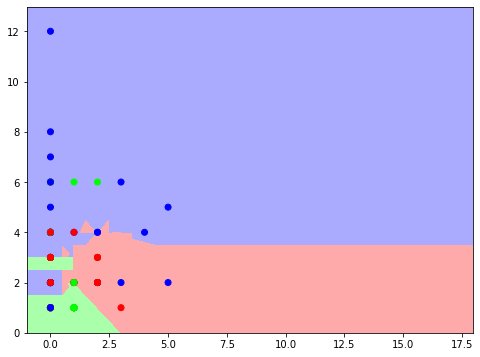

In [28]:

ord_feat = ['Mn','Si','O','Fe','Co','Li']

X = np.array(data_rebalanced[ord_feat])
y = np.array(data_rebalanced['Crystal System (#)'])
runTest(clf,X,y,plotTest=False)

training score 0.4859154929577465
testing score 0.44594594594594594


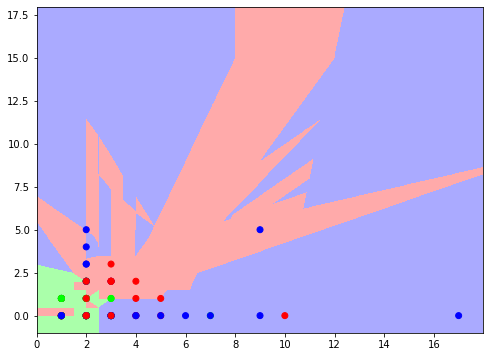

In [29]:

ord_feat = ['Li','Mn','Si','O','Fe','Co']

X = np.array(data_rebalanced[ord_feat])
y = np.array(data_rebalanced['Crystal System (#)'])
runTest(clf,X,y,plotTest=False)

In [30]:
    ord_feat = ['Spacegroup (ordinal)','Formation Energy (eV)','E Above Hull (eV)','Band Gap (eV)',
            'Nsites','Density (gm/cc)','Volume','Has Bandstructure',
            'Li','Mn','Si','O','Fe','Co'
           ]
    
    X = data_rebalanced[ord_feat]
    y = data_rebalanced['Crystal System (#)']

    # 80% training data and 20% testing
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)
    dtree = DecisionTreeClassifier()
    dtree.fit(Xtrain,ytrain)
    yp = dtree.predict(Xtest)

    accuracy=accuracy_score(yp,ytest)

    macro_precision=precision_score(yp,ytest,average='macro')
    micro_precision=precision_score(yp,ytest,average='micro')

    macro_recall=recall_score(yp,ytest,average='macro')
    micro_recall=recall_score(yp,ytest,average='micro')

    macro_f1=f1_score(yp,ytest,average='macro')
    micro_f1=f1_score(yp,ytest,average='micro')

    results.append([titles[i],accuracy,macro_precision,micro_precision,macro_recall,micro_recall,macro_f1,micro_f1])

NameError: ignored

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)

In [ ]:
from sklearn import neighbors
knn_clf = neighbors.KNeighborsClassifier(n_neighbors=5)


ord_feat = ['Spacegroup (ordinal)','Formation Energy (eV)','E Above Hull (eV)','Band Gap (eV)',
            'Nsites','Density (gm/cc)','Volume','Has Bandstructure',
            'Li','Mn','Si','O','Fe','Co'
           ]

X_train, X_test, y_train, y_test = train_test_split(data_rebalanced[ord_feat], y,test_size=0.2, random_state = 1)
#knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, ypred)
print('Classification Report:',)
print(result1)
result2 = accuracy_score(y_test,ypred)
print('Accuracy:',result2)

In [ ]:
pip install --upgrade scikit-learn
import scikit-learn
scikit-learn.__version__

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay

n_neighbors = 15

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
    )

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )

plt.show()

In [ ]:
import sklearn
sklearn.__version__

In [ ]:
from sklearn.tree import DecisionTreeClassifier
method = DecisionTreeClassifier()
ord_feat = ['Formation Energy (eV)','E Above Hull (eV)','Band Gap (eV)',
            'Nsites','Density (gm/cc)','Volume','Has Bandstructure',
            'Spacegroup (ordinal)','Li','Mn','Si','O','Fe','Co'
           ]
model = method.fit(train[ord_feat].to_numpy(),train['Crystal System'].to_numpy())

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


cn=['monoclinic', 'orthorhombic', 'triclinic']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=900)
tree.plot_tree(model,feature_names = ord_feat, class_names=cn,filled = True)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
method = DecisionTreeClassifier()
ord_feat = ['Formation Energy (eV)','E Above Hull (eV)','Band Gap (eV)',
            'Nsites','Density (gm/cc)','Volume','Has Bandstructure',
            'Li','Mn','Si','O','Fe','Co'
           ]
model = method.fit(train[ord_feat].to_numpy(),train['Crystal System'].to_numpy())

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


cn=['monoclinic', 'orthorhombic', 'triclinic']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=900)
tree.plot_tree(model,feature_names = ord_feat, class_names=cn,filled = True)

In [ ]:
# Plot KNearestNeighbors
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=14)
#data_rebalanced['Spacegroup (ordinal)'] = pd.factorize(data_rebalanced['Spacegroup'])[0]

#ord_feat = ['Spacegroup (ordinal)','Formation Energy (eV)','E Above Hull (eV)','Band Gap (eV)',
#            'Nsites','Density (gm/cc)','Volume','Has Bandstructure',
#            'Li','Mn','Si','O','Fe','Co'
#           ]

ord_feat = ['Density (gm/cc)','Volume']

X = np.array(data_rebalanced[ord_feat])
y = np.array(data_rebalanced['Crystal System (#)'])
runTest(clf,X,y,plotTest=False)